Esse notebook foi desenvolvido como forma de estudo, entrando em contato com as bibliotecas Pandas para manipulação de dados extensos e para familiarização com algumas ferramentas de plotagem.

In [329]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import datetime as dt
import numpy as np




df = pd.read_csv("/content/global_daily_rqds_ea96_aba1_7a6f.csv",error_bad_lines=False)



In [330]:
df.shape

(105631, 7)

In [331]:
df.head(3)

,sea_level,time,latitude,longitude,station_name,station_country,gloss_id
0,millimeters,UTC,degrees_north,degrees_east,NaN,NaN,NaN
1,1585,1982-11-06T12:00:00Z,0.92,330.657,Peter & Paul Rocks,Brazil,199.0
2,1570,1982-11-07T12:00:00Z,0.92,330.657,Peter & Paul Rocks,Brazil,199.0


Como a 2a linha aponta apenas informações complementares, vou excluir para ficar apenas com valores numéricos

In [332]:
df = df.drop([0],axis = 0)
df.head(3)

,sea_level,time,latitude,longitude,station_name,station_country,gloss_id
1,1585,1982-11-06T12:00:00Z,0.92,330.657,Peter & Paul Rocks,Brazil,199.0
2,1570,1982-11-07T12:00:00Z,0.92,330.657,Peter & Paul Rocks,Brazil,199.0
3,1580,1982-11-08T12:00:00Z,0.92,330.657,Peter & Paul Rocks,Brazil,199.0


Removendo colunas que não serão utilizadas...

In [333]:
df.pop('latitude')
df.pop('longitude')
df.pop('station_country')
df.pop('gloss_id')

1         199.0
2         199.0
3         199.0
4         199.0
5         199.0
          ...  
105626    352.0
105627    352.0
105628    352.0
105629    352.0
105630    352.0
Name: gloss_id, Length: 105630, dtype: float64

In [334]:
df.head(3)

,sea_level,time,station_name
1,1585,1982-11-06T12:00:00Z,Peter & Paul Rocks
2,1570,1982-11-07T12:00:00Z,Peter & Paul Rocks
3,1580,1982-11-08T12:00:00Z,Peter & Paul Rocks


In [335]:
df.dtypes

sea_level       object
time            object
station_name    object
dtype: object

Convertendo as variaveis

In [336]:
df['datetime'] = pd.to_datetime(df['time'],errors='coerce')
df['sea_level'] = pd.to_numeric(df['sea_level'])
df['datetime'] = df['datetime'].dt.to_pydatetime()
df['time'] = pd.to_datetime(df['datetime'])
df['time'] = df['time'].map(dt.datetime.toordinal)

In [337]:
df.dtypes

sea_level                   float64
time                          int64
station_name                 object
datetime        datetime64[ns, UTC]
dtype: object

In [338]:
df.head(3)

,sea_level,time,station_name,datetime
1,1585.0,723855,Peter & Paul Rocks,1982-11-06 12:00:00+00:00
2,1570.0,723856,Peter & Paul Rocks,1982-11-07 12:00:00+00:00
3,1580.0,723857,Peter & Paul Rocks,1982-11-08 12:00:00+00:00


Verificando quais e quantas stations temos nesse df:



In [339]:
print(df.station_name.unique())
print(len(df.station_name.unique()))


['Peter & Paul Rocks' 'Natal' 'Fer. de Noronha' 'Trindade' 'Belem, USCGS'
 'Ilha Fiscal, RJ' 'Cananeia' 'Ubatuba' 'Fortaleza, USCGS' 'Fortaleza'
 'Termisa' 'Canavieiras, USCGS' 'Salvador, USCGS' 'Salvador'
 'Rio de Janeiro, CG' 'Suape' 'Luis Correia' 'Recife, USCGS' 'Rio Grande'
 'Madeira' 'Santana' 'Santana SSN' 'Imbituba' 'Macae']
24


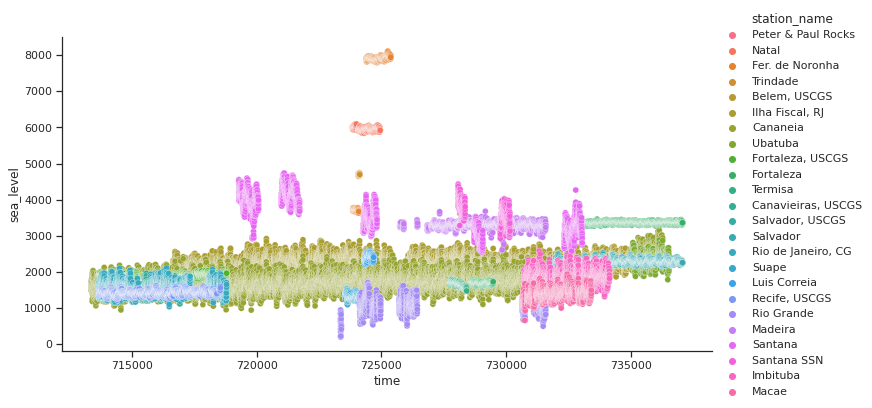

In [340]:
import seaborn as sns
sns.set_theme(style="ticks")



# Define the palette as a list to specify exact values
palette = sns.color_palette("Paired",len(df.station_name.unique()))

# Plot the lines on two facets
sns.relplot(
    data=df,
    x="time", y="sea_level",
    hue="station_name",  aspect=2, linewidth=0.25)

Como ainda está muito poluído, vou comparar somente as stations com maiores extensões




In [341]:
cj = df.groupby("station_name")["time"].max().to_frame(name = 'max_time').reset_index()
cj.columns =['station_name', 'max_time']
min_time = df.groupby("station_name")['time'].min()
min_time = min_time.reset_index(level=None, drop=False, inplace=False)
min_time = min_time['time']
cj['min_time'] = min_time
cj['timedelta'] = cj['max_time'] - cj['min_time']
print (cj)


          station_name  max_time  min_time  timedelta
0         Belem, USCGS    718797    713685       5112
1             Cananeia    736265    713376      22889
2   Canavieiras, USCGS    716240    714081       2159
3      Fer. de Noronha    725371    723857       1514
4            Fortaleza    737059    728621       8438
5     Fortaleza, USCGS    718797    713685       5112
6      Ilha Fiscal, RJ    735233    716639      18594
7             Imbituba    734137    730720       3417
8         Luis Correia    724686    724310        376
9                Macae    733407    730680       2727
10             Madeira    731580    725738       5842
11               Natal    724949    723847       1102
12  Peter & Paul Rocks    724966    723855       1111
13       Recife, USCGS    718551    713684       4867
14          Rio Grande    731580    723359       8221
15  Rio de Janeiro, CG    718796    713685       5111
16            Salvador    737059    731857       5202
17     Salvador, USCGS    71

In [342]:
filtered  = cj[~(cj['timedelta'] <= 15000)]  
print(filtered)

      station_name  max_time  min_time  timedelta
1         Cananeia    736265    713376      22889
6  Ilha Fiscal, RJ    735233    716639      18594


Assim, eliminarei todos que não estiverem nesta lista no df original:

In [343]:
to_delete  = cj[~(cj['timedelta'] > 15000)]  
print(to_delete)

          station_name  max_time  min_time  timedelta
0         Belem, USCGS    718797    713685       5112
2   Canavieiras, USCGS    716240    714081       2159
3      Fer. de Noronha    725371    723857       1514
4            Fortaleza    737059    728621       8438
5     Fortaleza, USCGS    718797    713685       5112
7             Imbituba    734137    730720       3417
8         Luis Correia    724686    724310        376
9                Macae    733407    730680       2727
10             Madeira    731580    725738       5842
11               Natal    724949    723847       1102
12  Peter & Paul Rocks    724966    723855       1111
13       Recife, USCGS    718551    713684       4867
14          Rio Grande    731580    723359       8221
15  Rio de Janeiro, CG    718796    713685       5111
16            Salvador    737059    731857       5202
17     Salvador, USCGS    717336    713685       3651
18             Santana    733041    719288      13753
19         Santana SSN    73

In [344]:
df2 = df

df2 = (df2[~df2.station_name.isin(to_delete.station_name)])
print(df2)

       sea_level    time     station_name                  datetime
8515      2170.0  716639  Ilha Fiscal, RJ 1963-02-03 12:00:00+00:00
8516      2114.0  716640  Ilha Fiscal, RJ 1963-02-04 12:00:00+00:00
8517      2092.0  716641  Ilha Fiscal, RJ 1963-02-05 12:00:00+00:00
8518      2205.0  716642  Ilha Fiscal, RJ 1963-02-06 12:00:00+00:00
8519      2311.0  716643  Ilha Fiscal, RJ 1963-02-07 12:00:00+00:00
...          ...     ...              ...                       ...
47409     2376.0  736261         Cananeia 2016-10-24 12:00:00+00:00
47410     2448.0  736262         Cananeia 2016-10-25 12:00:00+00:00
47411     2367.0  736263         Cananeia 2016-10-26 12:00:00+00:00
47412     2339.0  736264         Cananeia 2016-10-27 12:00:00+00:00
47413     2942.0  736265         Cananeia 2016-10-28 12:00:00+00:00

[38899 rows x 4 columns]


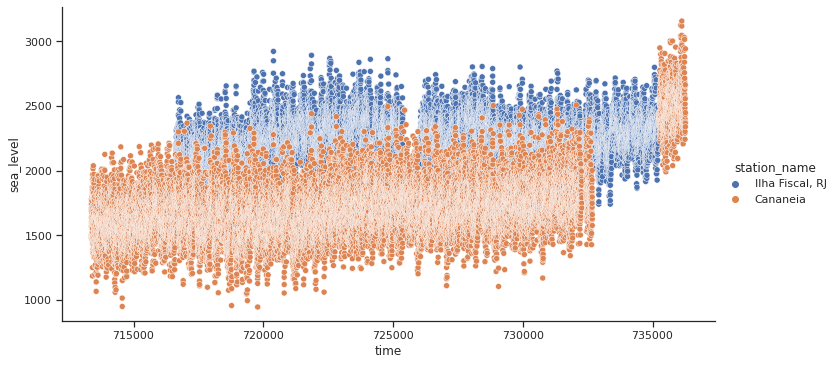

In [345]:
sns.relplot(
    data=df2,
    x="time", y="sea_level",
    hue="station_name",  aspect=2)

Devido ao claro erro de posicionamento vertical no marégrafo de Cananeia, removerei o nível do trecho final, mais alto, devido à inexistência de referência ao nível original. Fonte: http://uhslc.soest.hawaii.edu/rqds/atlantic/doc/qa281b.dmt 

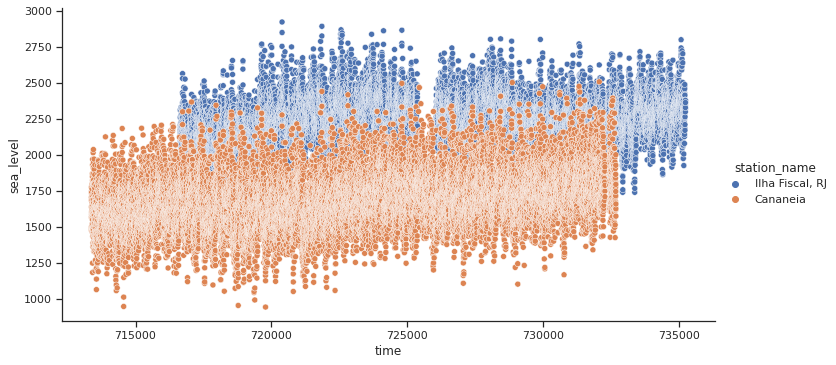

In [346]:
to_delete2  = df2[(df2['datetime'] > '2013-01-01') & (df2['station_name'] == 'Cananeia')] 
df2 = (df2[~df2.isin(to_delete2)])
a = df2.dropna(subset = ["datetime"], inplace=True)

sns.relplot(
    data=df2,
    x="time", y="sea_level",
    hue="station_name",  aspect=2)

Verificação de tendência (elevação do nível do mar)

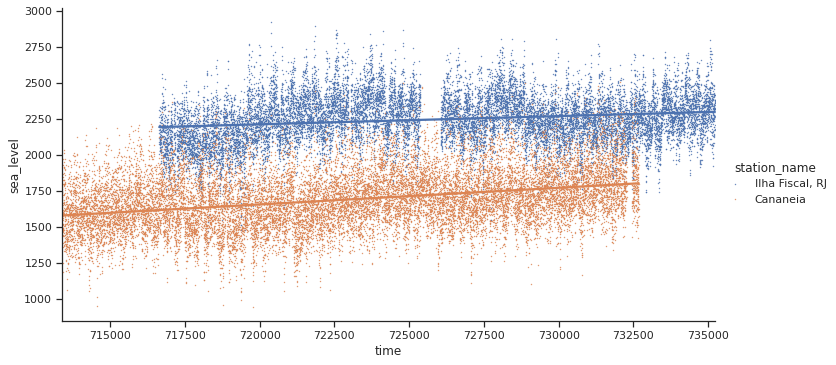

In [354]:
 sns.set_theme(style="ticks")
# Define the palette as a list to specify exact values
palette = sns.color_palette()
 
 sns.lmplot(
    data=df2,
    x="time", y="sea_level",
    hue="station_name", scatter = True, aspect = 2,scatter_kws = {"linewidth": 0.01, "s" : 2})

Verificando os níveis máximos de maré e níveis mínimos de maré a cada mês. Para isso, o delta T é mensal.

In [357]:
dfCA_temp = df2[(df2['station_name'] =='Cananeia')] #Elaborando um DF só com cananeia

#A partir dele, extrairei as informações de máximos, mínimos, médios e 
dfCA = dfCA_temp.groupby([dfCA_temp["datetime"].dt.year,dfCA_temp["datetime"].dt.month])["sea_level"].max()
dfCA = dfCA.to_frame(name = 'max_tide')
min_tide = dfCA_temp.groupby([dfCA_temp["datetime"].dt.year,dfCA_temp["datetime"].dt.month])["sea_level"].min()
dfCA['min_tide'] = min_tide
dfCA['mean'] = dfCA_temp.groupby([dfCA_temp["datetime"].dt.year,dfCA_temp["datetime"].dt.month])["sea_level"].mean()
dfCA['station_name'] = "Cananeia"
dfCA






max_tide  min_tide         mean station_name
datetime datetime                                              
1954     2           1705.0    1685.0  1695.000000     Cananeia
         3           1798.0    1466.0  1625.000000     Cananeia
         4           1969.0    1184.0  1580.833333     Cananeia
         5           2037.0    1330.0  1684.096774     Cananeia
         6           1971.0    1330.0  1582.833333     Cananeia
...                     ...       ...          ...          ...
2006     8           2294.0    1641.0  1903.000000     Cananeia
         9           2394.0    1471.0  1870.133333     Cananeia
         10          2219.0    1514.0  1779.354839     Cananeia
         11          2289.0    1497.0  1844.100000     Cananeia
         12          2001.0    1426.0  1731.258065     Cananeia

[635 rows x 4 columns]

O mesmo para Ilha Fiscal:

In [358]:
dfIF_temp = df2[(df2['station_name'] =='Ilha Fiscal, RJ')] #Elaborando um DF só com Ilha fiscal


dfIF = dfIF_temp.groupby([dfIF_temp["datetime"].dt.year,dfIF_temp["datetime"].dt.month])["sea_level"].max()
dfIF = dfIF.to_frame(name = 'max_tide')
min_tide2 = dfIF_temp.groupby([dfIF_temp["datetime"].dt.year,dfIF_temp["datetime"].dt.month])["sea_level"].min()
dfIF['min_tide'] = min_tide2
dfIF['mean'] = dfIF_temp.groupby([dfIF_temp["datetime"].dt.year,dfIF_temp["datetime"].dt.month])["sea_level"].mean()
dfIF['station_name'] = "Ilha Fiscal, RJ"
dfIF

max_tide  min_tide         mean     station_name
datetime datetime                                                  
1963     2           2311.0    2008.0  2126.307692  Ilha Fiscal, RJ
         3           2330.0    1976.0  2143.258065  Ilha Fiscal, RJ
         4           2286.0    1943.0  2094.250000  Ilha Fiscal, RJ
         5           2564.0    1890.0  2215.033333  Ilha Fiscal, RJ
         6           2469.0    1851.0  2121.766667  Ilha Fiscal, RJ
...                     ...       ...          ...              ...
2013     8           2722.0    2065.0  2391.161290  Ilha Fiscal, RJ
         9           2702.0    2018.0  2327.066667  Ilha Fiscal, RJ
         10          2482.0    1975.0  2264.903226  Ilha Fiscal, RJ
         11          2444.0    1926.0  2242.133333  Ilha Fiscal, RJ
         12          2488.0    2170.0  2339.000000  Ilha Fiscal, RJ

[611 rows x 4 columns]

In [359]:

#Recompilando os dados em um df unico mensal
dfMontly = dfCA.append(dfIF, sort=False)

dfMontly.index = dfMontly.index.set_names(['year', 'month'])
dfMontly.reset_index(inplace=True)


dfMontly['date'] = pd.to_datetime(dfMontly[["year", "month"]].assign(DAY=1))
dfMontly.pop('year')
dfMontly.pop('month')



dfMontly

,max_tide,min_tide,mean,station_name,date
0,1705.0,1685.0,1695.000000,Cananeia,1954-02-01
1,1798.0,1466.0,1625.000000,Cananeia,1954-03-01
2,1969.0,1184.0,1580.833333,Cananeia,1954-04-01
3,2037.0,1330.0,1684.096774,Cananeia,1954-05-01
4,1971.0,1330.0,1582.833333,Cananeia,1954-06-01
...,...,...,...,...,...
1241,2722.0,2065.0,2391.161290,"Ilha Fiscal, RJ",2013-08-01
1242,2702.0,2018.0,2327.066667,"Ilha Fiscal, RJ",2013-09-01
1243,2482.0,1975.0,2264.903226,"Ilha Fiscal, RJ",2013-10-01
1244,2444.0,1926.0,2242.133333,"Ilha Fiscal, RJ",2013-11-01


Alterando o index para facilitar as plotagens

In [360]:
ax1 = dfMontly.set_index('date', inplace=True)


Plotando os valores comparando Cananeia e Ilha fiscal:

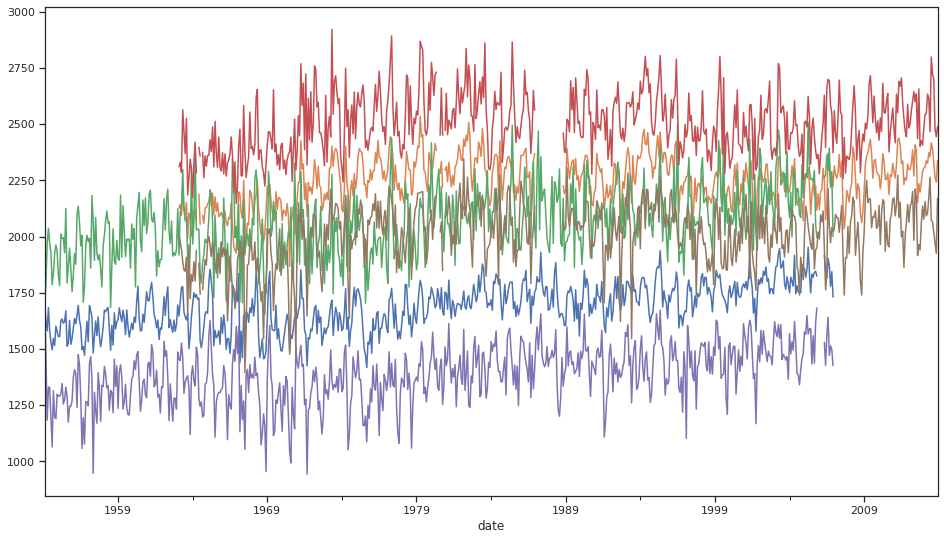

In [361]:
pl_mean = dfMontly.groupby('station_name')['mean']
pl_max = dfMontly.groupby('station_name')['max_tide']
pl_min = dfMontly.groupby('station_name')['min_tide']


fig, axs = plt.subplots(figsize=(16, 9))

l1 = pl_mean.plot(ax = axs)
l2 = pl_max.plot(ax = axs)
l3 = pl_min.plot(ax = axs)


Ainda assim, muito poluida sem a separaçao em cada estação. Utilizarei os dados separados já obtidos anteriormente (dfCA e 

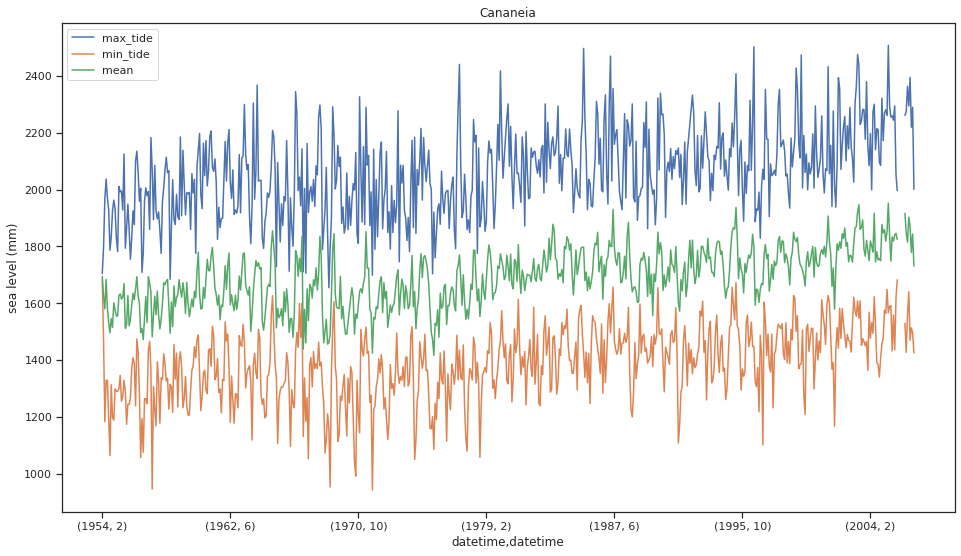

In [362]:
fig, axs = plt.subplots(figsize=(16, 9))
plt.title('Cananeia')
plt.xlabel('Time')
plt.ylabel('sea level (mm)')
p = dfCA.plot(ax = axs )

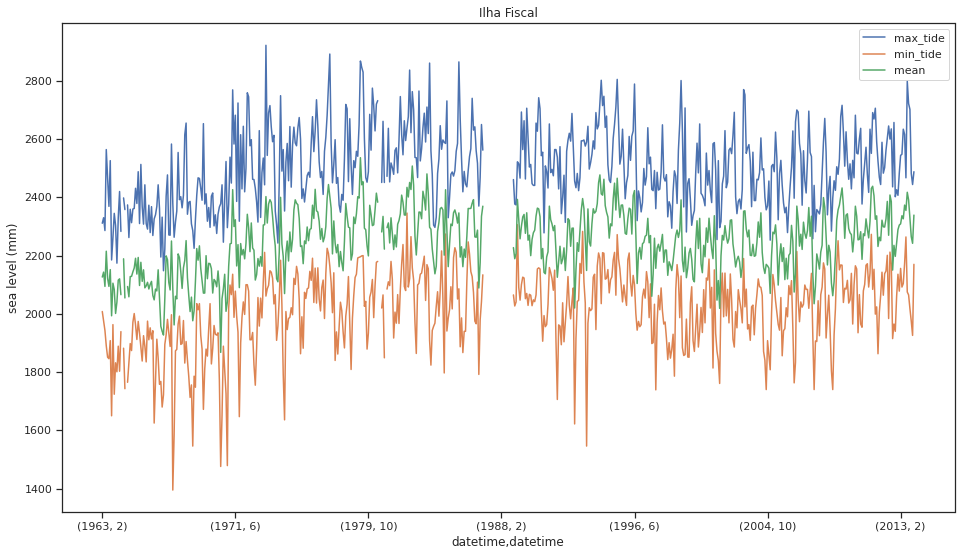

In [363]:
fig, axs = plt.subplots(figsize=(16, 9))
plt.title('Ilha Fiscal')
plt.xlabel('Time')
plt.ylabel('sea level (mm)')
p = dfIF.plot(ax = axs )